# Food Delivery Cost and Profitability Analysis

Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.

Below is the process we can follow for the task of Food Delivery Cost and Profitability Analysis:

### 1. Start by gathering comprehensive data related to all aspects of food delivery 
operations.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
data = pd.read_csv("food_orders_new_delhi.csv")
data.head()

C:\Users\Han\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [2]:
# Display basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


Order & Delivery Date and Time is in object dtype so we need to change to Date&Time

In [3]:
# 
data.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [4]:
# 
data.shape

(1000, 12)

### 2. Clean the dataset for inconsistencies, missing values, or irrelevant information.

In [5]:
#
data.duplicated().sum()

0

In [6]:
# Checking for missing values
data.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [7]:
# Fill missing values in Discounts and Offers with 'None'
data['Discounts and Offers'] = data['Discounts and Offers'].fillna('None')

In [8]:
#
data['Discounts and Offers'].isnull().sum()

0

In [9]:
from datetime import datetime

# Convert date columns to datetime
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])
     
# Rename columns for easier reference
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                1000 non-null   int64         
 1   customer_id             1000 non-null   object        
 2   restaurant_id           1000 non-null   object        
 3   order_date_and_time     1000 non-null   datetime64[ns]
 4   delivery_date_and_time  1000 non-null   datetime64[ns]
 5   order_value             1000 non-null   int64         
 6   delivery_fee            1000 non-null   int64         
 7   payment_method          1000 non-null   object        
 8   discounts_and_offers    1000 non-null   object        
 9   commission_fee          1000 non-null   int64         
 10  payment_processing_fee  1000 non-null   int64         
 11  refunds/chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [10]:
data.head()

,order_id,customer_id,restaurant_id,order_date_and_time,delivery_date_and_time,order_value,delivery_fee,payment_method,discounts_and_offers,commission_fee,payment_processing_fee,refunds/chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


### 3. Find the most common payment method. What is the proportion of the most common delivery method? 

In [11]:
# Find the most common payment method
payment_counts = data['payment_method'].value_counts()
payment_counts

payment_method
Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: count, dtype: int64

In [12]:
most_common = payment_counts.index[0]
most_common

'Cash on Delivery'

In [13]:
most_common_proportion = payment_counts[most_common] / len(data)
most_common_proportion

0.357

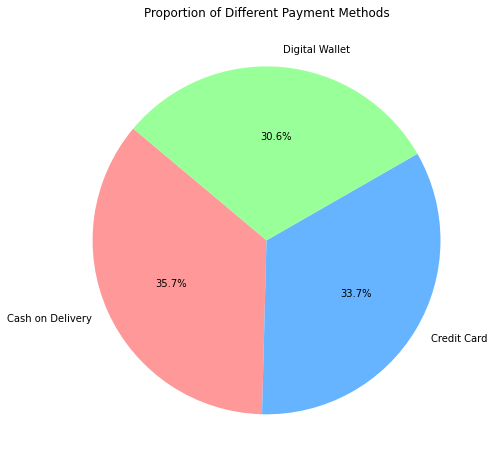

In [14]:
import matplotlib.pyplot as plt

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title("Proportion of Different Payment Methods")
plt.show()

### 4. Find 95% confidence interval of the proportion of the most common payment method

In [15]:
from scipy.stats import norm

n = len(data)
p_hat = most_common_proportion
z = norm.ppf(0.975)  # 95% confidence level
margin_of_error = z * (p_hat * (1 - p_hat) / n) ** 0.5

ci_lower = p_hat - margin_of_error
ci_upper = p_hat + margin_of_error

print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")

95% Confidence Interval: (0.3273, 0.3867)


The 95% confidence interval suggests that the true proportion of the most commonly used payment method in the population lies between 32.73% and 38.67%. This means that if we were to take multiple samples, 95% of the time, the true proportion would fall within this range. The relatively narrow confidence interval indicates high confidence in our estimate.

### 5. Determine the average and the median commission fee.

In [16]:
avg_commission = data['commission_fee'].mean()
median_commission = data['commission_fee'].median()

print(f"Average Commission Fee: {avg_commission:.2f}")
print(f"Median Commission Fee: {median_commission:.2f}")

Average Commission Fee: 126.99
Median Commission Fee: 127.00


The closeness of these two values indicates that the commission fee distribution is approximately symmetric, with no extreme outliers significantly skewing the average.

### 6. Find the average order value of the customer

In [17]:
avg_order_value = data['order_value'].mean()
print(f"Average Order Value: {avg_order_value:.2f}")

Average Order Value: 1053.97


This value provides insight into consumer spending behavior and can be used to estimate total revenue generation for the business. If the business aims to increase profitability, strategies such as upselling, promotional offers, or premium services could be introduced to encourage higher spending per order.

### 7. Find the probability that a commission fee is
1. More than 120 
2. Less than 143 
3. Between 86 and 133 



In [18]:
prob_more_than_120 = (data['commission_fee'] > 120).mean()
prob_less_than_143 = (data['commission_fee'] < 143).mean()
prob_between_86_and_133 = ((data['commission_fee'] >= 86) & (data['commission_fee'] <= 133)).mean()

print(f"P(Commission Fee > 120): {prob_more_than_120:.2f}")
print(f"P(Commission Fee < 143): {prob_less_than_143:.2f}")
print(f"P(86 ≤ Commission Fee ≤ 133): {prob_between_86_and_133:.2f}")

P(Commission Fee > 120): 0.55
P(Commission Fee < 143): 0.60
P(86 ≤ Commission Fee ≤ 133): 0.32


These probabilities indicate that:

- 55% of orders have a commission fee greater than 120, suggesting that more than half of the transactions contribute significantly to platform revenue.
- 60% of orders have a commission fee below 143, meaning the majority of orders fall within this reasonable range.
- 32% of orders have commission fees between 86 and 133, highlighting the variability in commission structures across different transactions

### 8. Fine the average delivery time of the orders done by the credit card 

In [19]:
# Calculate delivery time
data['delivery_time'] = (data['delivery_date_and_time'] - data['order_date_and_time']).dt.total_seconds() / 60  # Convert to minutes

# Filter for Credit Card orders
avg_delivery_time_cc = data[data['payment_method'] == 'Credit Card']['delivery_time'].mean()

print(f"Average Delivery Time (Credit Card): {avg_delivery_time_cc:.2f} minutes")

Average Delivery Time (Credit Card): 74.01 minutes


This is relatively high and may indicate delays due to payment processing, logistics inefficiencies, or long-distance deliveries.

### 9. What is the lowest order value of 10% largest orders done by Cash on delivery? 


In [20]:
cash_orders = data[data['payment_method'] == 'Cash on Delivery']
top_10_percent_cash = cash_orders['order_value'].quantile(0.9)

print(f"Lowest Order Value of Top 10% (Cash on Delivery): {top_10_percent_cash}")

Lowest Order Value of Top 10% (Cash on Delivery): 1802.4000000000003


This suggests that high-value orders are common among COD users, possibly because customers prefer to pay large amounts in cash rather than using digital payments.

### 10. What is the highest order value of 60% least orders done by Digital Wallet? 


In [21]:
digital_wallet_orders = data[data['payment_method'] == 'Digital Wallet']
bottom_60_percent_dw = digital_wallet_orders['order_value'].quantile(0.6)

print(f"Highest Order Value of Bottom 60% (Digital Wallet): {bottom_60_percent_dw}")

Highest Order Value of Bottom 60% (Digital Wallet): 1187.0


This suggests that Digital Wallet transactions tend to cluster around mid-range order values. Businesses may consider offering cashback or incentives to encourage higher spending via digital payments.

### 11. By what amount is the mean value by Digital Wallet more or less than that of Cash on delivery? 


In [22]:
mean_digital_wallet = digital_wallet_orders['order_value'].mean()
mean_cash = cash_orders['order_value'].mean()

diff_mean = mean_digital_wallet - mean_cash
print(f"Difference in Mean Order Value (Digital Wallet - Cash): {diff_mean:.2f}")

Difference in Mean Order Value (Digital Wallet - Cash): -9.98


The negative difference implies that on average, Digital Wallet users spend slightly less than Cash on Delivery users. While the difference is small, it may indicate that COD users are more comfortable placing higher-value orders, possibly due to trust issues with digital transactions or preference for post-delivery payments.

### 12. The delivery time for any item will take more than 53 minutes. Using a significance level of 0.05, prove or disapprove this claim. 


In [23]:
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(data['delivery_time'], 53)

if p_value / 2 < 0.05 and t_stat > 0:  # One-tailed test
    print("Reject the null hypothesis: Delivery time is significantly greater than 53 minutes.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that delivery time is greater than 53 minutes.")

Reject the null hypothesis: Delivery time is significantly greater than 53 minutes.


Since we rejected the null hypothesis, this means that there is significant statistical evidence to conclude that the average delivery time is greater than 53 minutes. This finding indicates potential delivery inefficiencies that may need to be addressed through better logistics, optimized delivery routes, or increased restaurant efficiency.

### 13. What is the range within which the middle 50% ordering-delivery durations differ? 


In [24]:
q1 = data['delivery_time'].quantile(0.25)
q3 = data['delivery_time'].quantile(0.75)

print(f"Middle 50% of Delivery Times: {q1:.2f} to {q3:.2f} minutes")

Middle 50% of Delivery Times: 50.00 to 96.00 minutes


The interquartile range (IQR) reveals that 50% of the orders are delivered within 50 to 96 minutes. This range provides a useful benchmark for setting customer expectations and performance targets for delivery operations. Orders below 50 minutes may represent efficient deliveries, while those above 96 minutes might indicate bottlenecks or delays.

### 14. Find the distribution of various payment methods whose Refunds/Chargebacks is more than zero.

In [25]:
refunds = data[data['refunds/chargebacks'] > 0]
payment_method_distribution = refunds['payment_method'].value_counts()

print("Distribution of Payment Methods (Refunds > 0):")
print(payment_method_distribution)

Distribution of Payment Methods (Refunds > 0):
payment_method
Credit Card         102
Cash on Delivery    101
Digital Wallet       82
Name: count, dtype: int64


The distribution shows that Credit Card and Cash on Delivery transactions have the highest refund/chargeback cases, followed by Digital Wallet.

- Credit Card Refunds (102 cases): Possibly due to payment failures, customer disputes, or fraud detection measures.
- Cash on Delivery Refunds (101 cases): Likely driven by customer order cancellations, delivery issues, or unavailability of cash at the time of delivery.
- Digital Wallet Refunds (82 cases): Comparatively lower, suggesting that digital payments are more stable with fewer disputes or failures.